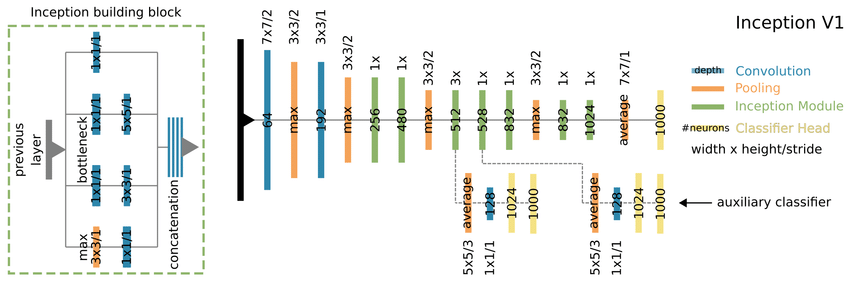

In [ ]:
from tensorflow.keras.layers import Concatenate , Conv2D , Dense , Input , MaxPool2D , AveragePooling2D , Flatten , Dropout 

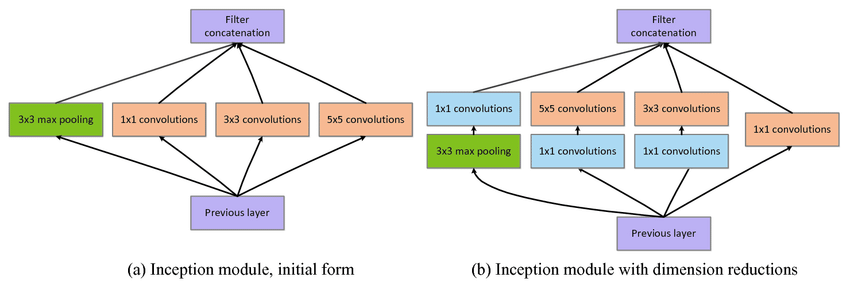

In [ ]:
def inception_block(x , filters) : 
  t1 = Conv2D(filters[0] , kernel_size=1 , activation="relu")(x)

  t2 = Conv2D(filters[1] , kernel_size=1 , activation="relu")(x)
  t2 = Conv2D(filters[2] , kernel_size=3 , padding="same" ,  activation="relu")(t2)

  t3 = Conv2D(filters[3] , kernel_size=1 , activation="relu")(x)
  t3 = Conv2D(filters[4] , kernel_size=5 , padding="same" ,  activation="relu")(t3)

  t4 = MaxPool2D(pool_size=3 , strides=1 , padding="same")(x)
  t4 = Conv2D(filters[5] , kernel_size=1 , activation="relu")(t4)

  output = Concatenate()([t1,t2,t3,t4])
  return output

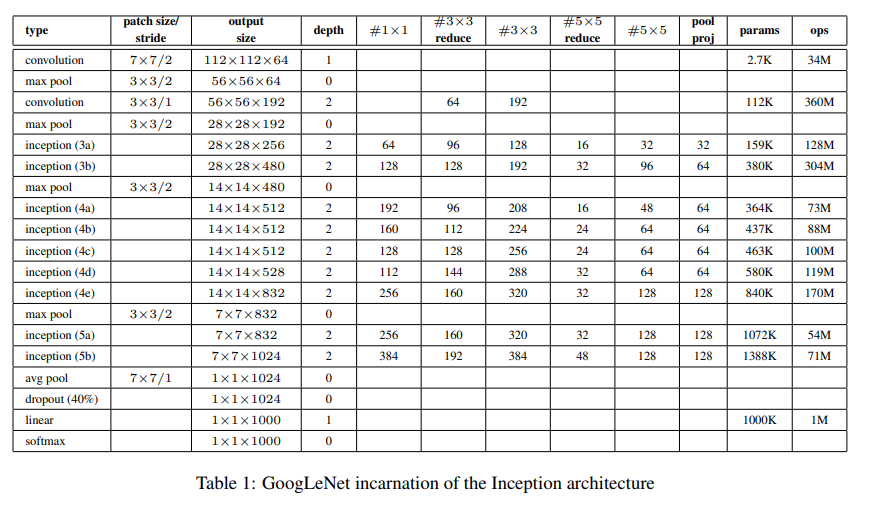

In [ ]:
input = Input([224,224,3])
x = Conv2D(filters=64 , kernel_size=7 , strides=2 , padding="same" , activation="relu")(input)
x = MaxPool2D(pool_size=3 , strides=2 , padding='same')(x)

x = Conv2D(filters=64 , kernel_size=1 , activation="relu")(x)
x = Conv2D(filters=192 , kernel_size=3 , activation="relu")(x)
x = MaxPool2D(pool_size=3 , strides=2 , padding="same")(x)

x = inception_block(x , [64,96,128,16,32,32])
x = inception_block(x , [128,128,192,32,96,64])
x = MaxPool2D(pool_size=3 , strides=2 , padding="same")(x)

x = inception_block(x , [192,96,208,16,48,64])
x = inception_block(x , [160,112,224,24,64,64])
x = inception_block(x , [128,128,256,24,64,64])
x = inception_block(x , [112,144,288,32,64,64])
x = inception_block(x , [256,160,320,32,128,128])
x = MaxPool2D(pool_size=3 , strides=2 , padding="same")(x)

x = inception_block(x , [256,160,320,32,128,128])
x = inception_block(x , [384,192,384,48,128,128])
x = AveragePooling2D(pool_size=7 , strides=1)(x)

x = Dropout(rate=0.4)(x)
output = Dense(units=1000 , activation="softmax")(x)

In [ ]:
from tensorflow.keras import Model 
model = Model(input , output )

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv2d_6[0][0]']               
                                                                                            

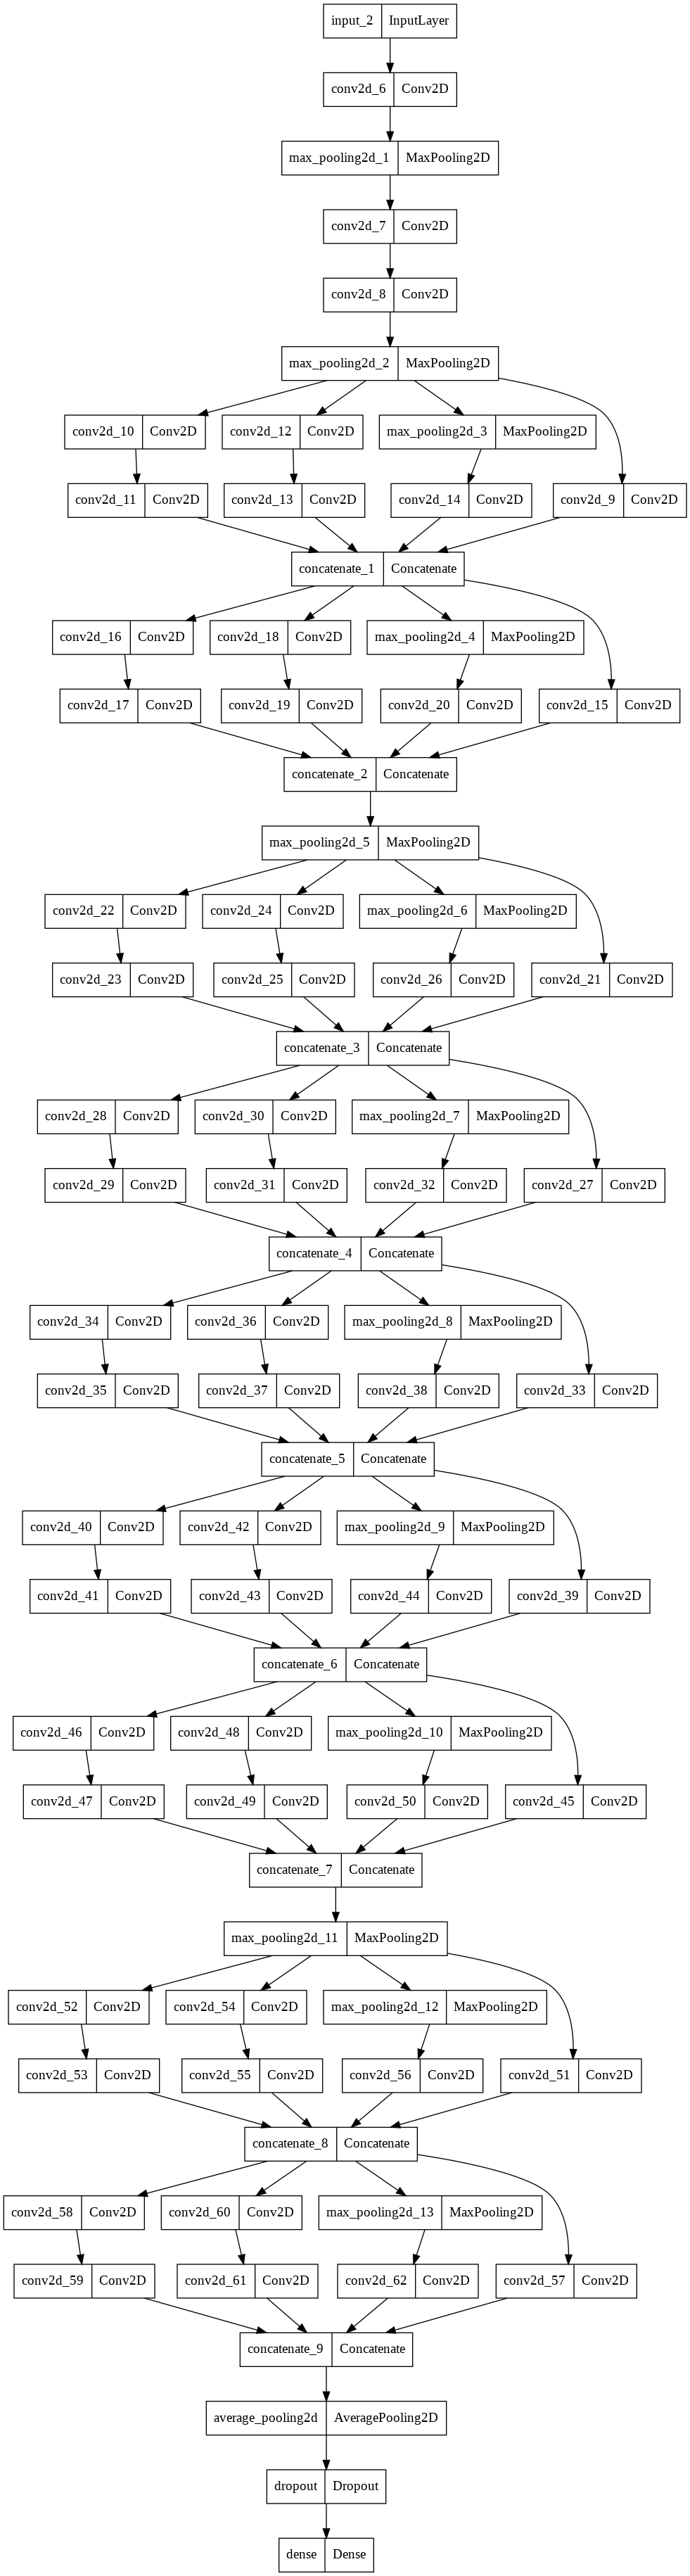

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)